In [1]:
import numpy as np
from ranker import CascadingBandits as CB
from ranker import RankBandits as RB
from ranker import BatchRank as BR
from ranker import BubbleRank as Bubble
from ranker import CombineRanker, CombineRankerFreq
from ranker.merge_rank import RealMergeRankAlgorithm as MA
from ranker.abstract_rank import AbstractRank
from user import CascadeUser
from user import PBMUser 
from user import DCMUser
from _kllcb import kllcb as kl
from _klucb import klucb as kb

import os
import logging
import timeit 
import csv
import cPickle as pk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
method = [CB, RB,  BR]
method_name = ['CB', 'RankBandit', 'PBM', 'BatchRank']

method = [CB, Bubble, CombineRanker, MA]
method_name = ['CascadingBandits', 'Bubble', 'CombineRanker', 'MergeRank']

method = [CB, Bubble, MA]
method_name = ['CascadingBandits', 'Bubble', 'Merge']

In [23]:
from random import shuffle
cp = [0.45, 0.35, 0.25, 0.15, 0.05]
kappa = [0.9, 0.6, 0.3]

# cp = [0.95, 0.85, 0.75, 0.65, 0.55]
# kappa = [0.9, 0.6, 0.3]
cp = [0.3674827985032505, 0.05846870349676189, 0.031652559859027075, 0.021065842871618955, 0.020371870575905664, 0.01836310318888777, 0.013286332087437732, 0.013074673869604207, 0.01045979312555887, 0.00937936615685552]
# 214456
cp = [0.35837245696400627, 0.2017167381974249, 0.1617161716171617, 0.08968609865470852, 0.08888888888888889, 0.08403361344537816, 0.07936507936507936, 0.07894736842105263, 0.06862745098039216, 0.0196078431372549]
# 19815
# cp = [0.34760705289672544, 0.14864864864864866, 0.10096153846153846, 0.09053497942386832, 0.08536585365853659, 0.058823529411764705, 0.056, 0.05263157894736842, 0.041666666666666664, 0.03496503496503497]
# np.random.shuffle(cp)
cp = [0.8533, 0.0172, 0.0064, 0.0035, 0.0038, 0.0009, 0.0069, 0.0005, 0.0041, 0.0086]


kappa = [0.99997132, 0.95949374, 0.76096783, 0.59179909, 0.45740329, 0.38584302, 0.33052186, 0.28372475, 0.26211924, 0.26700303]
p_stop = [0.6555304, 0.4868164, 0.46051615, 0.46315161, 0.45642676, 0.47130397, 0.50317268, 0.54764235, 0.65359742, 0.99998025]
n_top = 5

# kappa = [0.9] * 8+ [pow(0.5, 4)] *2
# p_stop = [1.0]*10
# cp = [0.5] * 9 + [0.9]
    
l = len(cp)
k = len(kappa)
ranker = [inst(range(l), kappa[:], 'klucb', 3) for inst in method]
# ranker.append(CombineRankerFreq(range(l), kappa[:], 'klucb', 3, initial_step=10000))
# shuffle(cp)
cp = np.asarray([.3,.3,.3,.3,.3,.0,.0,.0,.0,.3]) 
print np.sort(cp)
print cp
cm_user = CascadeUser(cp, kappa, p_stop)
pbm_user = PBMUser(cp, kappa, np.ones(l))
dcm_user = DCMUser(cp, kappa, p_stop)

[0.  0.  0.  0.  0.3 0.3 0.3 0.3 0.3 0.3]
[0.3 0.3 0.3 0.3 0.3 0.  0.  0.  0.  0.3]


In [24]:
iterations = 10000
regret = np.zeros((len(ranker), iterations))
n_top = 10

In [25]:
positions = np.zeros((iterations, l))
user = cm_user
start_time = timeit.default_timer()
for i in range(iterations):
    for idx_bandit, click_bandit in enumerate(ranker):
        arms = click_bandit.get_arms()
        ck = user.get_click(arms)
        click_bandit.update(ck, arms)
        regret[idx_bandit, i] = user.ndcg_rel(arms[:5])
print timeit.default_timer() - start_time
cr = np.cumsum(regret, axis=1)

3.14503908157


[[ 7.93469943  8.78863108  9.51135765 10.51135765 11.38015257 12.23408422
  13.10287915 13.9568108  14.82560572 15.82560572]
 [10.73758984 11.73758984 12.73758984 13.73758984 14.73758984 15.60638477
  16.60638477 17.60638477 18.60638477 19.60638477]
 [ 6.10769332  6.97648825  7.63732804  8.02089441  8.66083979  9.30078518
   9.98513673 10.62508211 11.11031067 11.94073057]]


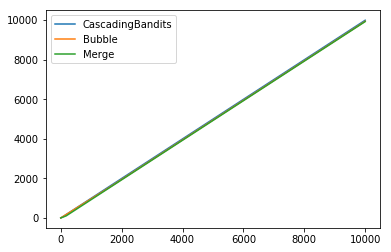

In [26]:
for idx, name in enumerate(method_name):
    plot(cr[idx,:])
# xscale('log')
legend(method_name, loc=0)
print cr[:, 10:20]

In [61]:
p = np.random.permutation(10)
print pbm_user.attraction[p]
print p, pbm_user.is_valid(p)

[0.01960784 0.35837246 0.20171674 0.07894737 0.0896861  0.07936508
 0.08888889 0.16171617 0.06862745 0.08403361]
[9 0 1 7 3 6 4 2 8 5] True


In [44]:
pbm_user.conservative_constraint

5.0

In [295]:
self = user
# regret of arms (chosen items)
l_star = self.l_star[:len(arms)]
print np.prod(1 - self.vt[arms]) - np.prod(1 - self.vt[l_star])

0


In [8]:
import csv
f = open('../data/' + 'dcm.csv')
reader = csv.reader(f)
reader.next()

cp = []
for r in reader:
    cp.append([float(t) for t in r[1][1:-1].split(',')])
    

ValueError: invalid literal for float(): 0.6555304  0.4868164  0.46051615 0.46315161 0.45642676 0.47130397
 0.50317268 0.54764235 0.65359742 0.99998025

In [10]:
cp = np.asarray(cp)
sp = np.sort(cp.ravel())
for i in range(5):
    print np.mean(sp[120*i:120+120*i])
    

0.02744145648961107
0.08730294024088191
0.1644858126806972
0.2415551657036374
0.4377059274994534


In [490]:
0.02717756891734417
0.08754631425627178
0.1518210565923404
0.2328084588120237
0.4164793478002463

array([], dtype=float64)

In [41]:
pbm_user.p_click

array([0.16171617, 0.08888889, 0.06862745, 0.07894737, 0.01960784,
       0.07936508, 0.20171674, 0.35837246, 0.0896861 , 0.08403361])

In [ ]:
0.010612618846645614
0.026977377653961784
0.05843324950879077
0.1164039595931768
0.3548209042361564

In [3]:
def klucb(w, n, t, c=3, precision=1e-5):
    return kb(w, n, t, c, precision)



In [3]:
a = pk.load(open(pre+name[0]+'-toprank.pkl'))

In [6]:
b = pk.load(open(pre+name[0]+'.pkl'))

In [15]:
pre = 'results/5000000/'
name = ['DCM5', 'PBM5']

In [16]:
for n in name:
    r_top = pk.load(open(pre+n+'-toprank.pkl')) 
    r = pk.load(open(pre+n+'.pkl'))
    r.update(r_top)
    with open(pre+n+'-all.pkl', 'wb') as f:
        pk.dump(r, f)

In [8]:
b.update(a)

In [12]:
with open(pre+name[0]+'-all.pkl', 'wb') as f:
    pk.dump(b, f)

In [13]:
c = pk.load(open(pre+name[0]+'-all.pkl'))

['BubbleRank', 'BaselineRank', 'TopRank', 'CascadeKL-UCB', 'MergeRank']